# Введение в анализ данных

## Условное математическое ожидание

В этом ноутбуке мы рассмотрим понятие условного матожидания на нескольких примерах. **Формальное определение будет вводиться на курсе по теории вероятностей**, поэтому в данном ноутбуке будут показаны только частные случаи и их интерпретация. **Основная цель – пояснить интуицию и дать практическое представление** о том, как это понятие работает, еще до углубления в формальную теорию.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.integrate import quad
from sklearn.neighbors import KernelDensity
from typing import Callable, Union, Optional, Tuple, List

np.random.seed(42)
sns.set_style("darkgrid")
sns.set(font_scale=1.3)

### 1. Поведение пользователя на сайте

Пусть есть ситуация: мы хотим предсказать или промоделировать поведение пользователя на сайте. Представим эту задачу в терминах теории вероятностей:

1. **Вероятностное пространство**

  Представим, что $\Omega$ — это множество всех возможных состояний пользователя, которые могут повлиять на его действия на сайте. Сюда входит:

  - Его настроение (доброе/раздражённое),
  - Цель визита (купить/посмотреть/сравнить),
  - Даже "с какой ноги встал" — всё, что мы не можем измерить напрямую.

  Для этой $\Omega$ также имеется некоторая сигма-алгебра $\mathscr{G}$ и вероятностная мера $\mathsf{P}$, которые вместе задают вероятностное пространство $(\Omega, \mathscr{G}, \mathsf{P})$. Вероятностная мера $\mathsf{P}$ позволяет нам количественно оценить, насколько вероятны те или иные множества состояний.


2. **Случайная величина** $X$

  Пусть $X(\omega)$ — это действие пользователя, которое мы можем наблюдать:

  - $X = 1$ — пользователь купил товар,
  - $X = 0$ — пользователь ушёл без покупки.

  Однако $X$ зависит от скрытого состояния $\omega$. Например, могут быть следующие зависимости:

  - Если пользователь в хорошем настроении (то есть $\omega$ включает "хорошее настроение"), то $X(\omega) = 1$ и покупка состоялась.
  - Если пользователь раздражён (то есть $\omega$ включает "злой клиент"), то $X(\omega) = 0$ и пользователь ушел без покупки.

3. **Сигма-алгебра** $\mathscr{F}$

  Мы не видим $\omega$ напрямую, но мы можем наблюдать косвенные признаки. Примеры таких признаков включают:

  - Время захода,
  - Геолокация,
  - Устройство пользователя,
  - Поведение пользователя на сайте.

  Эти признаки разбивают $\Omega$ на "измеримые" группы. Например:

  - Событие $A$ = \{все $\omega$, где пользователь зашёл с мобильного устройства утром\},
  - Событие $B$ = \{все $\omega$, где заход произошел из Москвы\}.

  $\mathscr{F}$ — это сигма-алгебра всех таких видимых для нас событий, которые мы можем различать и использовать для анализа.

---
Поскольку мы не знаем точное $\omega$, но видим, например, что пользователь зашёл с мобильного утром (событие $A$), мы можем спрогнозировать его поведение следующим образом:

$$\mathsf{E}(X \mid A) = \text{cредняя вероятность покупки для всех } \omega \in A.$$

Это значение представляет собой *условное математическое ожидание*, которое помогает оценить поведение пользователя, учитывая наличие определённых наблюдаемых факторов.

Например, если из данных известно, что среди "мобильных утренних пользователей" 70% совершают покупки, то:

$$
\mathsf{E}(X \mid A) = 0.7
$$

Можно также интерпретировать условное математическое ожидание как наилучшее (в некотором смысле) предсказание $X$ при имеющейся информации.

### 2. Условное математическое ожидание $E(X|\mathscr{F})$ для непрерывной $X$ и дискретной $\mathscr{F}$

#### Разбиение на интервалы длины 1

**Рассмотрим вероятностное пространство**:

- Пространство элементарных исходов $\Omega = [0, 10]$.
- Сигма-алгебра $\mathscr{G} = \mathscr{B}([0, 10])$ –  борелевская сигма-алгебра, содержащая все борелевские подмножества на отрезке $[0, 10]$.
- Вероятностная мера $\mathsf{P}$ задана как $\mathsf{P}([a, b]) = \frac{b-a}{10}$. Это равномерное распределение на отрезке $[0, 10]$.

**Случайная величина $X$**

Пусть $X$ — случайная величина, определённая как $X(\omega) = \omega^2$.

**Сигма-алгебра $\mathscr{F}$**

Теперь предположим, что мы наблюдаем только целую часть $\omega$. Это означает, что мы можем разбивать $\Omega$ на множества в виде $\{ [n, n+1) \mid n \in \{0, 1, 2, \ldots, 9\} \}$. Сигма-алгебра $\mathscr{F}$ в этом случае порождена этими множествами.

**Условное математическое ожидание**

Наша задача — найти условное математическое ожидание $\mathsf{E}(X \mid \mathscr{F})$, учитывая, что мы наблюдаем только целую часть $\omega$. Поскольку $\mathscr{F}$допускает разграничение по целой части, нам нужно вычислить среднее значение $X$ для каждого целого интервала:



Пусть $\omega \in [k, k+1)$. Тогда условное ожидание $\mathsf{E}(X \mid \mathscr{F})(\omega)$ — это среднее значение $X$ на этом отрезке:

$$
\mathsf{E}(X \mid \mathscr{F})(\omega) = \frac{1}{k - (k-1)} \int\limits_{k}^{k+1} X(x) \, dx = \int\limits_{k}^{k+1} x^2 \, dx
$$

**Вычисляем интеграл:**

$$
\int\limits_{k}^{k+1} x^2 \, dx = \left. \frac{x^3}{3} \right|_{k}^{k+1} = \frac{(k+1)^3 - k^3}{3}
$$

---

Результат зависит от $\omega$, то есть от того, в каком отрезке $[k, k+1)$ оно находится.

Это означает, что $\mathsf{E}(X \mid \mathscr{F})$ — случайная величина, которая постоянна на каждом отрезке $[k, k+1)$:

$$
\mathsf{E}(X \mid \mathscr{F})(\omega) =
\begin{cases}
0^2 + 0 + \frac{1}{3} \approx 0.333, & \omega \in [0, 1), \\
1^2 + 1 + \frac{1}{3} \approx 2.333, & \omega \in [1, 2), \\
\vdots &\vdots \\
9^2 + 9 + \frac{1}{3} \approx 90.333, & \omega \in [9, 10).
\end{cases}
$$



In [ ]:
def random_variable_x(omega: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    """
    Вычисляет значение случайной величины для заданного элементарного исхода.
    Реализует квадратичную зависимость.

    Параметры:
        omega: значение или массив значений элементарного исхода

    Returns:
        Соответствующее значение или массив значений случайной величины
    """
    return omega**2

def conditional_expectation(
    omega_values: np.ndarray,
    partition_size: float = 1.0,
    rv_function: callable = lambda x: x**2
) -> np.ndarray:
    """
    Вычисляет условное математическое ожидание случайной величины
    относительно сигма-алгебры, порожденной разбиением.

    Параметры:
        omega_values: массив значений элементарных исходов
        partition_size: размер интервалов разбиения
        rv_function: функция, задающая случайную величину

    Returns:
        Массив значений условного математического ожидания
    """
    interval_starts = np.floor(omega_values / partition_size) * partition_size
    interval_ends = interval_starts + partition_size

    integrals = np.array([
        quad(rv_function, a, b)[0]
        for a, b in zip(interval_starts, interval_ends)
    ])

    return integrals / partition_size

def plot_conditional_expectations(
    omega: np.ndarray,
    rv_values: np.ndarray,
    cond_exp_values: np.ndarray
) -> None:
    """
    Строит график случайной величины и ее условного математического ожидания.

    Параметры:
        omega: значения элементарных исходов
        rv_values: значения случайной величины
        cond_exp_values: значения условного математического ожидания
    """
    plt.figure(figsize=(8, 6))

    plt.plot(omega, rv_values, label='Случайная величина X(ω)', linewidth=3, color='violet')

    for i in range(10):
        mask = (omega >= i) & (omega < i+1)
        plt.plot(omega[mask], cond_exp_values[mask], linewidth=3, color='orange')

    plt.title('Cлучайная величина и условное математическое ожидание')
    plt.xlabel('Элементарный исход')
    plt.ylabel('Значение')
    plt.legend(['Значение случайной величины', 'Значение условного мат. ожидания'])

    plt.xlim(min(omega) - 0.1, max(omega))
    plt.ylim(min(rv_values) - 1, max(rv_values))

    plt.show()


Визуализируем случайную величину и условное математическое ожидание

In [ ]:
start = 0.0 # начало отрезка для генерации точек
end = 10.0 # конец отрезка для генерации точек
num_points = 1000 # количество точек для генерации

omega = np.linspace(start, end, num_points) # точки из вероятностного пространства
X_vals = random_variable_x(omega) # значения случайных величин в точках omega
E1_vals = conditional_expectation(omega, 1) # значение УМО

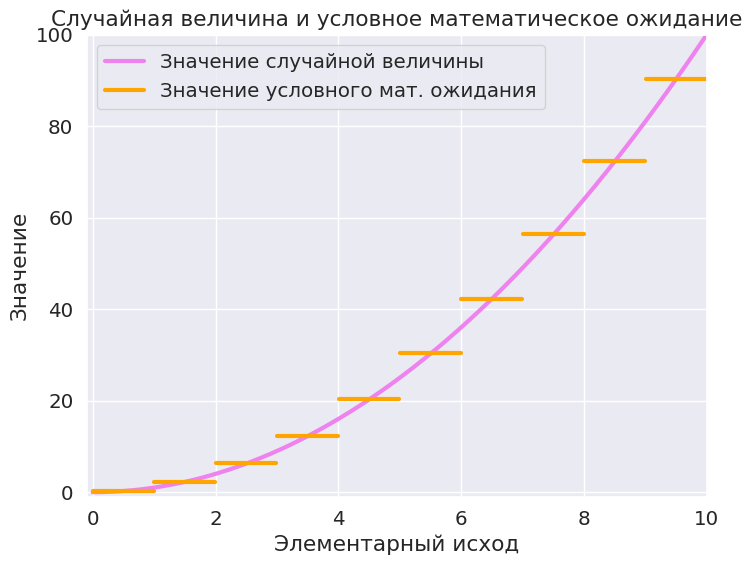

In [ ]:
plot_conditional_expectations(omega, X_vals, E1_vals)

#### Пример разбиения по интервалам длины 2

Рассмотрим случай, когда $\mathscr{H}$ — сигма-алгебра, порожденная интервалами вида $[k, k + 2)$, то есть $[0, 2)$, $[2, 4)$, ..., $[8, 10)$. Это означает, что мы знаем, в каком интервале длины 2 находится $\omega$.

Для вычисления условного математического ожидания $\mathsf{E}(X \mid \mathscr{H})(\omega)$ на каждом интервале $[k, k+2)$:

$$
\mathsf{E}(X \mid \mathscr{H})(\omega) = \frac{1}{2} \int\limits_{k}^{k+2} x^2 \, dx = \left. \frac{x^3}{6} \right|_{k}^{k+2} = \frac{(k+2)^3 - k^3}{6}
$$

Упрощая, получаем:

$$
\mathsf{E}(X \mid \mathscr{H})(\omega) = \frac{6k^2 + 12k + 8}{6} = \frac{k^2 + 2k + \frac{4}{3}}{1} = \frac{k^2 + 2k + 4}{3}
$$

Итоговая формула для условного математического ожидания:

$$
\mathsf{E}(X \mid \mathscr{H})(\omega) =
\begin{cases}
0^2 + 2 \cdot 0 + \frac{4}{3} \approx 1.333, & \omega \in [0, 2), \\
\vdots \\
8^2 + 2 \cdot 8 + \frac{4}{3} \approx 81.333, & \omega \in [8, 10).
\end{cases}
$$




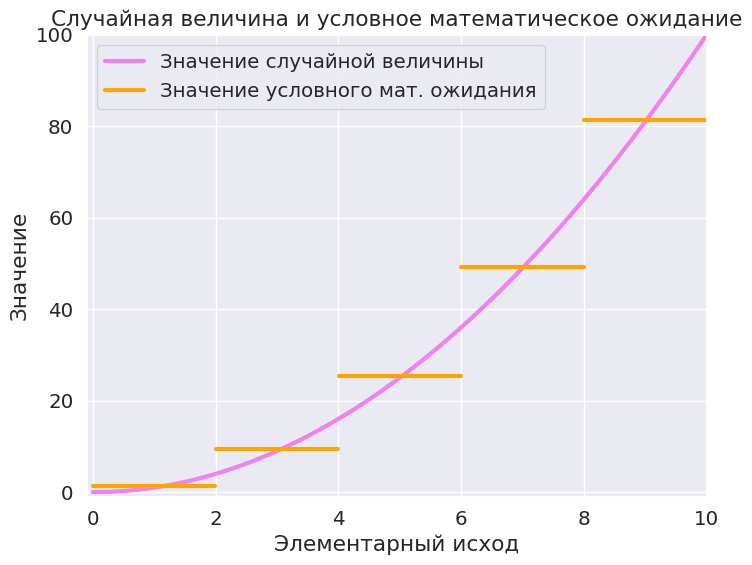

In [ ]:
E2_vals = conditional_expectation(omega, 2)
plot_conditional_expectations(omega, X_vals, E2_vals)

**Примеры выше можно обобщить формулой:**

Пусть $\Omega$ — вероятностное пространство, $\mathscr{F}$ — сигма-алгебра, порождённая разбиением $\Omega = \bigsqcup_{i=1}^{n} A_i$. Тогда условное математическое ожидание $\mathsf{E}(X \mid \mathscr{F})$ определяется следующим образом:

$$
\mathsf{E}(X \mid \mathscr{F})(\omega) = \sum_{i=1}^{n} \left( \frac{\mathsf{E} \big(X \cdot I\{ \omega \in A_i \}\big)}{\mathsf{P}(A_i)} \right) \cdot I\{ \omega \in A_i \}
$$

Полученная формула согласуется с интуицией и предыдущими примерами: если мы знаем только, что $\omega$ попал в $A_i$, то предсказание $X$ — это среднее $X$ на $A_i$.

### 2. Условное математическое ожидание $\mathsf{E}(Y|X)$ для непрерывных случайных величин

Пусть теперь случайная величина $Y$ (например, действие пользователя) зависит от другой случайной величины $X$ (например, дня недели). Теперь по наблюдаемому значению $X = x$ мы хотим предсказать среднее значение $Y$, то есть вычислить условное матожидание $\mathsf{E}(Y|X)$.

Рассмотрим как это можно сделать на примере следующих данных:

In [ ]:
def generate_cluster_data(n_samples: int = 600) -> Tuple[np.ndarray, np.ndarray]:
    """
    Генерирует три кластера данны.

    Параметры:
    ----------
    n_samples : int
        Общее количество точек данных, которое необходимо сгенерировать.
        Генерируемые точки равномерно распределяются между три кластера:
        - Синусоидальный
        - Линейный
        - Квадратичный

    Возвращаемое значение:
    ----------------------
    Tuple[np.ndarray, np.ndarray]
        Два массива, представляющих координаты X и Y сгенерированных данных соответственно.
    """
    # Синусоидальный кластер
    X_sin = np.random.uniform(-5, 2, n_samples//3)
    Y_sin = 2*np.sin(0.8*X_sin) + np.random.normal(0, 0.3, n_samples//3)

    # Линейный кластер
    X_lin = np.random.uniform(1, 5, n_samples//3)
    Y_lin = 0.7*X_lin - 2 + np.random.normal(0, 0.4, n_samples//3)

    # Квадратичный кластер
    X_quad = np.random.uniform(0, 4, n_samples//3)
    Y_quad = -0.4*(X_quad-2)**2 + 1.5 + np.random.normal(0, 0.3, n_samples//3)

    return np.concatenate([X_sin, X_lin, X_quad]), np.concatenate([Y_sin, Y_lin, Y_quad])

def plot_data(
    X: np.ndarray,
    Y: np.ndarray,
    x_grid: Optional[np.ndarray] = None,
    cond_exp: Optional[np.ndarray] = None,
) -> None:
    """
    Визуализирует сгенерированные данные и, при наличии, условное математическое ожидание.

    Параметры:
    ----------
    X : np.ndarray
        Массив значений для переменной X.

    Y : np.ndarray
        Массив значений для переменной Y, соответствующий X.

    x_grid : Optional[np.ndarray]
        Массив значений вдоль оси X, для которых вычислено условное математическое ожидание.

    cond_exp : Optional[np.ndarray]
        Массив условных математических ожиданий, вычисленных для каждого элемента x_grid.
        Если указано, данные условного математического ожидания будут отображены на графике.
    """
    plt.figure(figsize=(8, 5))

    # Разделение на кластеры
    masks = [
        (X >= -5) & (X <= 2),
        (X >= 1) & (X <= 5),
        (X >= 0) & (X <= 4)
    ]

    for mask in masks:
        plt.scatter(X[mask], Y[mask], c='violet', alpha=0.6)

    # Отрисовка условного ожидания
    if cond_exp is not None and x_grid is not None:
        plt.plot(x_grid, cond_exp, 'k-',
                 lw=3, c='orange', label='Условное математическое ожидание')

    plt.xlabel("Значение X")
    plt.ylabel("Значение Y")
    plt.title("Данные с условным математическим ожиданием")
    plt.show()

Для примера рассмотрим данные, которые состоят из нескольких кластеров.

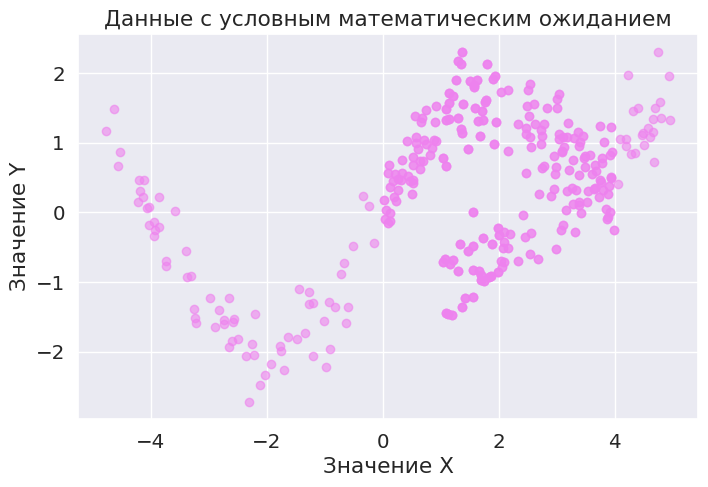

In [ ]:
X, Y = generate_cluster_data(n_samples=300)
plot_data(X, Y)

Вычисление условного математического ожидания $\mathsf{E}(Y|X=x)$ — это задача определения среднего значения случайной величины $Y$ при зафиксированном значении $X=x$. Однако, для непрерывных случайных величин, вероятность того, что $X$ примет конкретное значение, равно нулю: $\mathsf{P}(X=x)=0$. Это приводит к трудностям при прямом вычислении $\mathsf{E}(Y|X=x)$.

В курсе теории вероятностей вам расскажут, как его формально определить в этом случае, а наша задача – предоставить вам интуицию.

Вместо того, чтобы пытаться вычислить $\mathsf{E}(Y|X=x)$ напрямую, мы можем приближенно оценить его, используя семплирование данных в небольшой окрестности точки $x$. Этот метод позволит нам получить представление о поведении условного математического ожидания на практике.

Приближенный подход будет включать в себя следующие шаги:

- Генерация $n$ пар точек $(X_i, Y_i)$ из исходного распределения.

- Вычисление приближенного условного математического ожидания. Среднее значение $Y$ для данных, сгенерированных вокруг $x$, рассчитывается по формуле:
   $$
   \widehat{\mathsf{E}}(Y|X=x) = \frac{1}{n_{\varepsilon,x}} \sum_\limits{i=1}^{n} \mathsf{I}(|x - X_i| < \varepsilon) \cdot Y_i
   $$
   Здесь $n_{\varepsilon,x}$ — количество сгенерированных точек в $\varepsilon$-окрестности $x$.

In [ ]:
def calculate_conditional_expectation(
    X: np.ndarray,
    Y: np.ndarray,
    x_grid: np.ndarray,
    window_size: float = 0.5
) -> np.ndarray:
    """
    Вычисление условного ожидания через усреднение в окрестности
    """
    estimates = []
    for x in x_grid:
        # Находим точки в окрестности x
        in_window = (X >= x - window_size) & (X <= x + window_size)
        estimates.append(np.mean(Y[in_window]) if np.sum(in_window) > 0 else np.nan)
    return np.array(estimates)

Визуализируем условное математическое ожидание для полученных данных:

<ipython-input-28-85fb880172aa>:71: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_grid, cond_exp, 'k-',


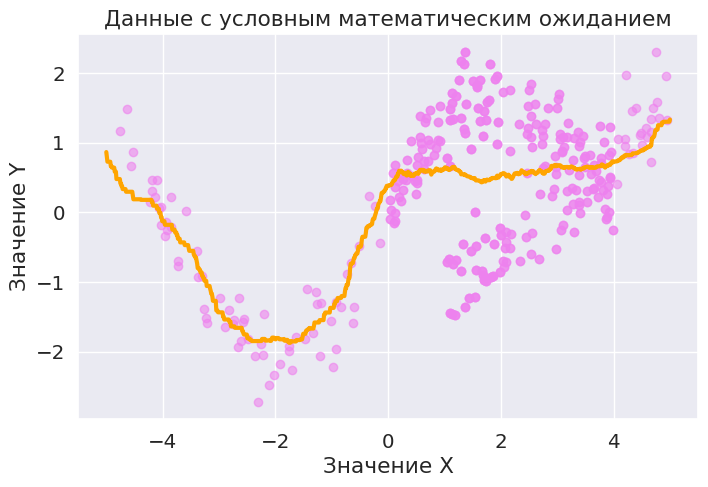

In [ ]:
x_grid = np.linspace(-5, 5, 1000)
cond_exp = calculate_conditional_expectation(X, Y, x_grid, window_size=0.8)
plot_data(X, Y, x_grid, cond_exp)

### 3. Условное распределение

#### Пример

Ранее мы рассматривали условные математические ожидания $\mathsf{E}(Y \mid X)$, которые дают усреднённое поведение $Y$ при известной информации о $X$. Теперь перейдём к более общей структуре — условным распределениям $\mathsf{P}(Y \in \cdot \mid \mathscr{F})$. которые описывают не только среднее, но и полную вероятностную картину.

Это более сложный объект, поэтому рассмотрим только дискретный случай.

---
Рассмотрим подробнее распределение случайной величины $Y$ при условии, что $X$ попадает в одно из множеств $A$ или $B$, образующих сигма-алгебру $\mathscr{F} = \sigma(\{A, B\})$.

**Случайная величина**

Сначала обозначим, что $X$ — это дискретная случайная величина, принимающая равновероятно значения $\{1, 2, 3, 4\}$. При этом $Y = X + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0,1)$, добавляет нормальный шум к $X$. Таким образом, распределение $Y$ является совокупностью нормальных распределений с центрами в значениях $X$.

**Группа $A$**\
Пусть $A = \{1, 2\}$, а попадание в эту группу эквивалентно $X \in \{1, 2\}$.

Если известно, что $X$ попал в множество $A$, то $Y$ является смесью распределений:

- Когда $X = 1$, $Y = 1 + \varepsilon \sim \mathcal{N}(1, 1)$.
- Когда $X = 2$, $Y = 2 + \varepsilon \sim \mathcal{N}(2, 1)$.

Так как $X$ принимает значения 1 или 2 с вероятностью $\frac{1}{2}$ в группе $A$, распределение $Y|A$ описывается как смесь:

$$
Y|A \sim \begin{cases}
\mathcal{N}(1, 1) & \text{с вероятностью } \frac{1}{2}, \\
\mathcal{N}(2, 1) & \text{с вероятностью } \frac{1}{2}.
\end{cases}
$$

**Математическое ожидание для $Y|A$**

Математическое ожидание смеси:

$$
\mathsf{E}(Y|A) = \frac{1}{2} \cdot \mathsf{E}(Y|X=1) + \frac{1}{2} \cdot \mathsf{E}(Y|X=2)
$$

Где:

- $\mathsf{E}(Y|X=1) = 1$,
- $\mathsf{E}(Y|X=2) = 2$.

Таким образом:

$$
\mathsf{E}(Y|A) = \frac{1}{2} \cdot 1 + \frac{1}{2} \cdot 2 = \frac{3}{2} = 1.5
$$

**Группа $B$**\
Пусть $B = \{3, 4\}$, а попадание в эту группу эквивалентно $X \in \{3, 4\}$. Для $B$ вычисления аналогичны.

Распределение $Y|B$ описывается как смесь:

$$
Y|B \sim \begin{cases}
\mathcal{N}(3, 1) & \text{с вероятностью } \frac{1}{2}, \\
\mathcal{N}(4, 1) & \text{с вероятностью } \frac{1}{2}.
\end{cases}
$$

Математическое ожидание смеси:

$$
\mathsf{E}(Y|B) = \frac{1}{2} \cdot 3 + \frac{1}{2} \cdot 4 = \frac{7}{2} = 3.5
$$



**Вывод**

Таким образом, мы увидели, что условное распределение $Y$ может быть выражено через смесь нормальных распределений в заданных группах, соответствующих разбиениям сигма-алгебры. Математическое ожидание этих распределений также отражает средние значения каждого из возможных состояний в группах, показывая усредненное поведение $Y$ в зависимости от наличия информации о $X$.


In [ ]:
sample_size=1000

X = np.random.choice([1, 2, 3, 4], size=sample_size, p=[0.25, 0.25, 0.25, 0.25])
Y = X + np.random.normal(0, 1, size=sample_size)  # Y = X + ε, где ε ~ N(0,1)

# Определим разбиение пространства исходов
A = (X == 1) | (X == 2)  # Множество A = {1, 2}
B = (X == 3) | (X == 4)  # Множество B = {3, 4}

# Вычислим параметры условных распределений
mu_A, sigma_A = np.mean(Y[A]), np.std(Y[A])
mu_B, sigma_B = np.mean(Y[B]), np.std(Y[B])

Визуализируем условное математическое ожидание на двух группах (среднее значение $Y$ в группах $A$ и $B$).

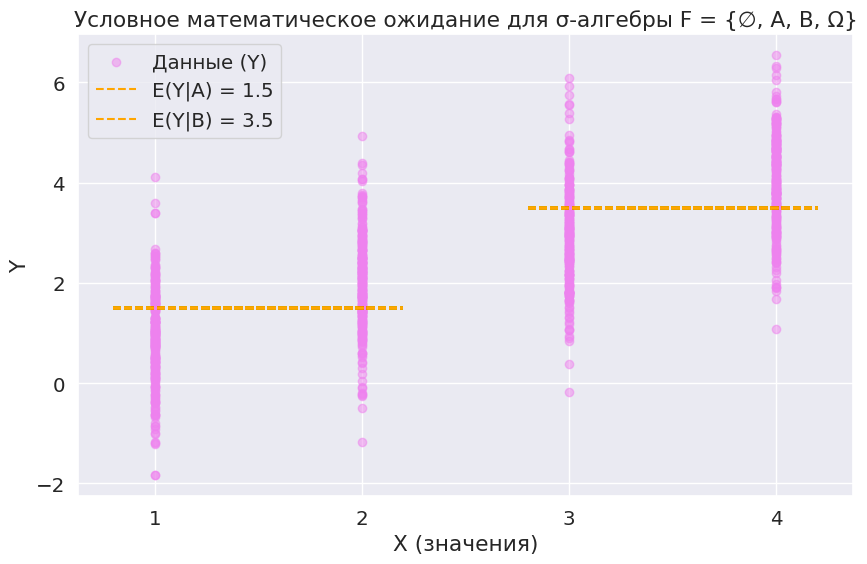

In [ ]:
# Условное математическое ожидание
conditional_expectation = np.zeros_like(Y, dtype=float)
conditional_expectation[A] = mu_A
conditional_expectation[B] = mu_B

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.5, label='Данные (Y)', c='violet')
plt.hlines(conditional_expectation[A], xmin=0.8, xmax=2.2, linestyles='--',
           color='orange',
           label=f'E(Y|A) = {conditional_expectation[A][0]:.1f}')
plt.hlines(conditional_expectation[B], xmin=2.8, xmax=4.2, linestyles='--',
           color='orange',
           label=f'E(Y|B) = {conditional_expectation[B][0]:.1f}')

plt.xticks([1, 2, 3, 4])
plt.xlabel('X (значения)')
plt.ylabel('Y')
plt.title('Условное математическое ожидание для σ-алгебры F = {∅, A, B, Ω}')
plt.legend()
plt.grid(True)
plt.show()

Визуализируем условные распределения (распределение при попадании в одну из групп).

In [ ]:
def mixture_pdf(x: np.ndarray,
               components: List[Tuple[float, float]],
               weights: List[float]) -> np.ndarray:
    """
    Вычисляет плотность вероятности смеси нормальных распределений.

    Parameters
    ----------
    x : np.ndarray
        Массив значений, в которых вычисляется плотность
    components : List[Tuple[float, float]]
        Список параметров компонентов смеси, где каждый элемент -
        кортеж (mean, std) для нормального распределения
    weights : List[float]
        Список весов компонентов (должны суммироваться в 1)

    Returns
    -------
    np.ndarray
        Массив значений плотности вероятности в точках x
    """
    # Нормализация весов
    weights = np.asarray(weights)
    weights = weights / weights.sum()

    # Инициализация массива плотностей
    pdf = np.zeros_like(x)

    # Суммирование компонентов
    for (mu, sigma), w in zip(components, weights):
        pdf += w * sps.norm.pdf(x, mu, sigma)

    return pdf

Посчитаем плотности смеси распределений.

In [ ]:
# Параметры распределений
# Для группы A (X ∈ {1,2})
components_A = [(1, 1), (2, 1)]  # (mean, std) для каждого компонента
weights_A = [0.5, 0.5]  # равные веса

# Для группы B (X ∈ {3,4})
components_B = [(3, 1), (4, 1)]
weights_B = [0.5, 0.5]

# Создаем сетку значений
y_grid = np.linspace(-2, 6, 500)

# Вычисляем плотности
pdf_A = mixture_pdf(y_grid, components_A, weights_A)
pdf_B = mixture_pdf(y_grid, components_B, weights_B)

Визуализируем.

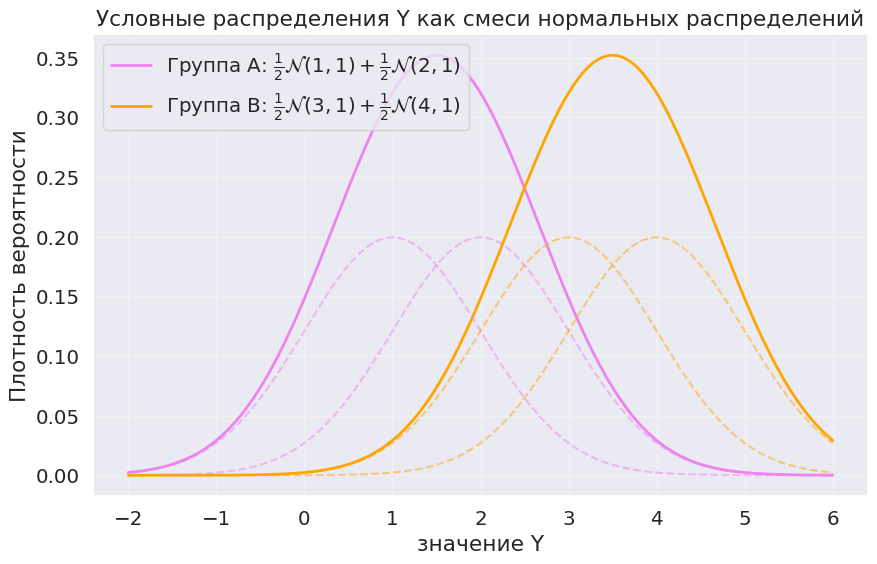

In [ ]:
# Строим график
plt.figure(figsize=(10, 6))
plt.plot(y_grid, pdf_A, linewidth=2, color='violet',
         label=r'Группа A: $\frac{1}{2}\mathcal{N}(1,1) + \frac{1}{2}\mathcal{N}(2,1)$')
plt.plot(y_grid, pdf_B, linewidth=2, color='orange',
         label=r'Группа B: $\frac{1}{2}\mathcal{N}(3,1) + \frac{1}{2}\mathcal{N}(4,1)$')


# Размечаем компоненты смеси пунктиром
for mu, sigma in components_A:
    plt.plot(y_grid, 0.5 * sps.norm.pdf(y_grid, mu, sigma), alpha=0.5,
             color='violet', linestyle='--')
for mu, sigma in components_B:
    plt.plot(y_grid, 0.5 * sps.norm.pdf(y_grid, mu, sigma), alpha=0.5,
             color='orange', linestyle='--')

plt.title('Условные распределения Y как смеси нормальных распределений')
plt.xlabel('значение Y')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Условное распределение случайной величины $Y$ при условии, что величина принадлежит определенной группе, позволяет нам узнать, как распределены вероятности для этой величины с учетом известной информации. В нашем примере, случайная величина $Y$ может относиться к группе $A$ или $B$, что сильно влияет на характер ее распределения.

**Интерпретация**\
В каждой группе ($A$ и $B$), $Y$ является смесью нормальных распределений. Это показывает, что даже если мы точно не знаем значение $X$, знание принадлежности к группе дает достаточно детализированное представление, чтобы вычислить распределение $Y$.

**Сдвиг средних**\
Мы видим, что параметр сдвига в исходных распределениях определят форму результирующего условного распределения. Если бы средние этих распределений были более далеки друг от друга, мы бы наблюдали двумодальное распределение, означающее наличие двух основных "колоколов" в плотности.


---
Таким образом, условное математическое ожидание может использоваться на для прогнозирования и принятия решений, где исходы зависят от контекста или условий. Это широко применяется в статистике (анализ данных), в прогнозировании (например, в финансах или метеорологии) и в управлении рисками.

Математическое ожидание показывает, как среднее значение реакции (например, в тестах или экспериментах) зависит от факторов, которые мы можем учитывать, и помимо описания среднего результата, он также указывает на существующую зависимость между величинами.
